In [83]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import folium.plugins as plugins
import matplotlib as mpl

In [84]:
df = pd.read_csv('EDA\df.csv')

In [85]:
### Create earthquakes map using Folium
m = folium.Map(location=[0,0], zoom_start=1)
for i in range(0,len(df)):
    folium.Circle(
    location=[df['Lat'][i],df['Long'][i]],
    popup=df['Date'][i],
    radius=df['Magnitude'][i]*100,
    color='crimson',
    fill=True,
    fill_color='crimson').add_to(m)
m.save('all_EQ_on_map.html')

In [86]:
### Create earthquakes heatmap over time using Folium
heatmap_time_data = list(df.groupby(['Date']))           
info = []
dates = []
for i in range(len(heatmap_time_data)):
    dates.append(heatmap_time_data[i][0])
    cur_date = []
    for j in list(map(list, zip(heatmap_time_data[i][1]['Lat'], heatmap_time_data[i][1]['Long'], heatmap_time_data[i][1]['Magnitude']/10))) :
        cur_date.append(j)
    info.append(cur_date)
    
# create a map
map_heatmap_time = folium.Map([0,0], tiles='CartoDB Positron', zoom_start=1)

# heatmap plugin
heatmap_time_plugin = plugins.HeatMapWithTime(info, index=dates)

# add heatmap plugin to map
heatmap_time_plugin.add_to(map_heatmap_time)

# save
map_heatmap_time.save('map_heatmap_time.html')

# display map
map_heatmap_time

In [87]:
### Create earthquakes map using Folium (Over magnitude 7)
df_over_7 = df[df['Magnitude']>7].reset_index(drop=True)
df_over_7
m = folium.Map(tiles='CartoDB Positron', location=[0,0], zoom_start=1)
for i in range(0,len(df_over_7)):
    folium.Circle(
    location=[df['Lat'][i],df['Long'][i]],
    popup=df['Date'][i],
    radius=df['Magnitude'][i]*100,
    color='crimson',
    fill=True,
    fill_color='crimson').add_to(m)
m.save('df_over_7.html')

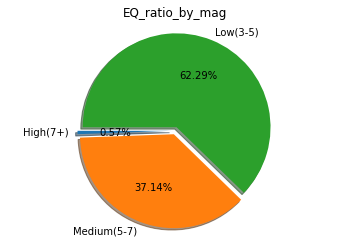

In [88]:
df_over_7 = df[df['Magnitude']>=7].reset_index(drop=True)
df_5_to_7 = df[(df['Magnitude']>=5) & (df['Magnitude']<7)].reset_index(drop=True)
df_3_to_5 = df[(df['Magnitude']>=3) & (df['Magnitude']<5)].reset_index(drop=True)
sizes = [len(df_over_7)/len(df)*100,len(df_5_to_7)/len(df)*100,len(df_3_to_5)/len(df)*100]
labels = [ 'High(7+)', 'Medium(5-7)', 'Low(3-5)']
explode = (0.04, 0.04, 0.04)
fig1, ax1 = plt.subplots()
ax1.pie(sizes,explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=180)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('EQ_ratio_by_mag')
plt.savefig('pie_chart_magnitude.png', transparent = True)
plt.show()

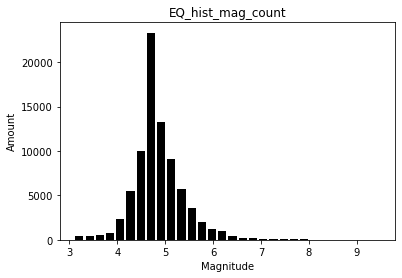

In [89]:
df.Magnitude.hist(bins=30, grid = False, rwidth=0.8, color ='black')
plt.xlabel('Magnitude')
plt.ylabel('Amount')
plt.title('EQ_hist_mag_count')
plt.savefig('hist_chart_magnitude.png', transparent = True)
plt.show()

In [90]:
df_over_7 = df[df['Magnitude']>=7].reset_index(drop=True)
df_5_to_7 = df[(df['Magnitude']>=5) & (df['Magnitude']<7)].reset_index(drop=True)
df_3_to_5 = df[(df['Magnitude']>=3) & (df['Magnitude']<5)].reset_index(drop=True)
df_over_7['Mag'] = 2
df_5_to_7['Mag'] = 1
df_3_to_5['Mag'] = 0
df_mag = pd.concat([df_over_7, df_5_to_7,df_3_to_5], ignore_index=True)
df_mag

Date      Time        Lat        Long  Magnitude  Mag
0      1902-04-19     02:23  14.000000  -91.000000        7.5    2
1      1904-08-27     21:56  64.700000 -148.100000        7.3    2
2      1905-04-04     00:50  32.100000   76.300000        7.8    2
3      1905-07-09     09:40  49.000000   97.000000        8.0    2
4      1905-09-08     01:43  38.670000   16.070000        7.2    2
...           ...       ...        ...         ...        ...  ...
80321  2003-10-24  16:53:20  51.833333   16.333333        3.4    0
80322  2003-10-16  22:44:43  36.166667   23.000000        4.6    0
80323  2003-10-16  11:27:45  42.000000   21.500000        4.3    0
80324  2003-10-16  04:40:04  37.333333   17.500000        4.0    0
80325  2003-10-13  21:48:40  41.333333   53.166667        4.8    0

[80326 rows x 6 columns]

In [91]:
hours_min = df_mag.Time.str.split(':')
hours=[]
for i in hours_min:
    hours.append(i[0])
df_mag['Hours'] = hours
df_mag['Hours'] = df_mag['Hours'].astype('float')

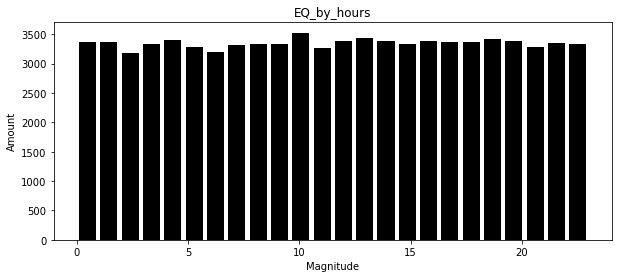

In [92]:
df = df_mag.sort_values(by=['Hours'])
plt.figure(figsize=(10,4))
df.Hours.hist(bins=24, grid = False, rwidth=0.8, color ='black')
plt.xlabel('Magnitude')
plt.ylabel('Amount')
plt.title('EQ_by_hours')
plt.savefig('EQ_by_hours.png', transparent = True)
plt.show()

In [93]:
### it's seems that there is no relation between the time and earthquakes occurrences

In [94]:
df_mag['Hours'] = df_mag['Hours'].astype('float') 
df_00_06 = df_mag[(df_mag['Hours']>=0) & ((df_mag['Hours']<6))].reset_index(drop=True)
df_06_12 = df_mag[(df_mag['Hours']>=6) & ((df_mag['Hours']<12))].reset_index(drop=True)
df_12_18 = df_mag[(df_mag['Hours']>=12) & ((df_mag['Hours']<18))].reset_index(drop=True)
df_18_00 = df_mag[df_mag['Hours']>=18].reset_index(drop=True)

df_00_06['Light'] = 1
df_06_12['Light'] = 2
df_12_18['Light'] = 3
df_18_00['Light'] = 4

df_mag_light = pd.concat([df_00_06, df_06_12, df_12_18, df_18_00], ignore_index=True)
df_mag_light

Date      Time        Lat        Long  Magnitude  Mag  Hours  \
0      1902-04-19     02:23  14.000000  -91.000000       7.50    2    2.0   
1      1905-04-04     00:50  32.100000   76.300000       7.80    2    0.0   
2      1905-09-08     01:43  38.670000   16.070000       7.20    2    1.0   
3      1906-08-17     00:10  50.600000 -178.360000       8.35    2    0.0   
4      1906-08-17     00:40 -33.000000  -72.000000       8.20    2    0.0   
...           ...       ...        ...         ...        ...  ...    ...   
80321  2003-11-12  19:24:42  41.333333   59.666667       4.80    0   19.0   
80322  2003-10-30  23:16:20  35.500000   25.666667       3.80    0   23.0   
80323  2003-10-29  21:15:51  41.333333   23.000000       4.30    0   21.0   
80324  2003-10-16  22:44:43  36.166667   23.000000       4.60    0   22.0   
80325  2003-10-13  21:48:40  41.333333   53.166667       4.80    0   21.0   

       Light  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
80321      4  
80322      4  
80323      4  
80324      4  
80325      4  

[80326 rows x 8 columns]

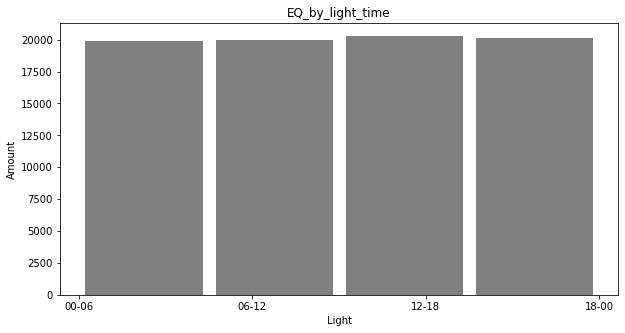

In [95]:
df = df_mag_light.sort_values(by=['Light'])
plt.figure(figsize=(10,5))
df.Light.hist(bins=4, grid = False, rwidth=0.9, color = 'grey')
plt.xlabel('Light')
plt.xticks([1,2,3,4],['00-06','06-12','12-18','18-00'])
plt.ylabel('Amount')
plt.title('EQ_by_light_time')
plt.savefig('EQ_by_light_time.png', transparent = True)
plt.show()

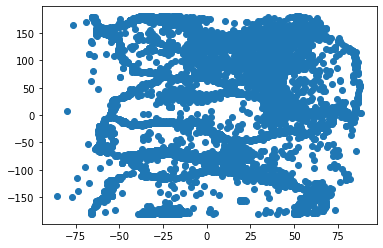

In [96]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(df_mag_light.Lat,df_mag_light.Long)
plt.show()

<ipython-input-97-86e1308f50c3>:13: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('EQ_by_Lan&long_color.png', transparent = True)
C:\Users\BarBenezri\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


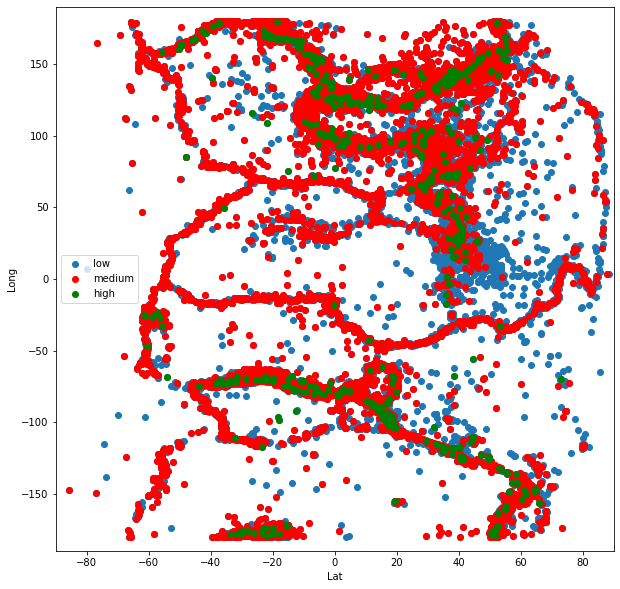

In [97]:
colormap = np.array(['b', 'r', 'g'])
fig = plt.figure(figsize=(10,10))
ax = plt.axes()
ax.set_ylim(-190,190)
ax.set_xlim(-90,90)

ax.scatter(df_mag_light.Lat, df_mag_light.Long)
ax.scatter(df_mag_light.Lat[df_mag_light.Mag==1], df_mag_light.Long[df_mag_light.Mag==1], c='red')
ax.scatter(df_mag_light.Lat[df_mag_light.Mag==2], df_mag_light.Long[df_mag_light.Mag==2], c='green')
ax.legend(labels=['low','medium', 'high'])
plt.xlabel('Lat')
plt.ylabel('Long')
plt.savefig('EQ_by_Lan&long_color.png', transparent = True)
plt.show()

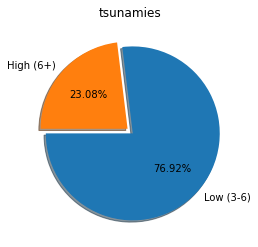

In [98]:
df = pd.read_csv('EDA\df_tsunami.csv')
fig = plt.figure()
ax = plt.axes()
df_tsunamies = df[df['Tsunami'] == 1]
df_over_6 = df_tsunamies[(df_tsunamies['Magnitude']>=6)].reset_index(drop=True)
df_3_to_6 = df_tsunamies[(df_tsunamies['Magnitude']>=3) & (df_tsunamies['Magnitude']<6)].reset_index(drop=True)
df_over_6['Mag'] = 1
df_3_to_6['Mag'] = 0
df = pd.concat([df_over_6,df_3_to_6], ignore_index=True)
ax.pie(df['Mag'].value_counts().tolist(), labels=['Low (3-6)', 'High (6+)'], shadow=True, startangle=180, explode= (0.04, 0.04), autopct='%1.2f%%')
plt.title('tsunamies')
plt.savefig('pie chart with tsunamies VS magnitde.png', transparent = True)
plt.show()

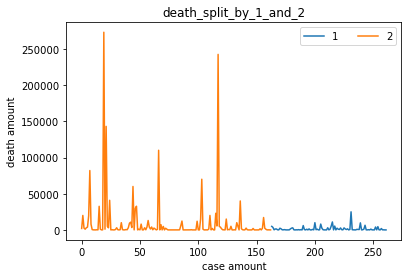

In [99]:
df = pd.read_csv('EDA\df_death.csv')
df['Deaths'] = df['Deaths'].astype('float')
df_over_7 = df[df['Magnitude']>=7].reset_index(drop=True)
df_5_to_7 = df[(df['Magnitude']>=5) & (df['Magnitude']<7)].reset_index(drop=True)
df_3_to_5 = df[(df['Magnitude']>=3) & (df['Magnitude']<5)].reset_index(drop=True)
df_over_7['Mag'] = 2
df_5_to_7['Mag'] = 1
df_3_to_5['Mag'] = 0
df_mag = pd.concat([df_over_7, df_5_to_7,df_3_to_5], ignore_index=True)
df_mag.groupby('Mag').Deaths.plot(kind='line')
plt.legend(loc='upper right', ncol=2)
plt.xlabel('case amount')
plt.ylabel('death amount')
plt.title('death_split_by_1_and_2')
plt.savefig('line chart with tsunamies VS magnitde.png', transparent = True)
plt.show()